# SVM Loan Approver

There are a number of classification algorithms that can be used to determine loan elgibility. Some algorithms run better than others. Build a loan approver using the SVM algorithm and compare the accuracy and performance of the SVM model with the Logistic Regression model.

In [56]:
from pathlib import Path
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")
import hvplot.pandas
%matplotlib inline

In [57]:
# Read in the data
# Note: The following data has been normalized between 0 and 1
data = Path('../Resources/loans.csv')
df = pd.read_csv(data)
df.head()

,assets,liabilities,income,credit_score,mortgage,status
0,0.210859,0.452865,0.281367,0.628039,0.302682,deny
1,0.395018,0.661153,0.330622,0.638439,0.502831,approve
2,0.291186,0.593432,0.438436,0.434863,0.315574,approve
3,0.458640,0.576156,0.744167,0.291324,0.394891,approve
4,0.463470,0.292414,0.489887,0.811384,0.566605,approve


## Separate the Features (X) from the Target (y)

In [58]:
# Segment the features from the target
y = df["status"]
X = df.drop(columns="status")


## Split our data into training and testing

In [59]:
# Use the train_test_split function to create training and testing subsets 
from sklearn.model_selection import train_test_split

# YOUR CODE HERE!
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

## Create a SVM Model

In [60]:
# Instantiate a linear SVM model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

## Fit (train) or model using the training data

In [61]:
# Fit the data
model.fit(X_train, y_train)



SVC(kernel='linear')

## Score the model using the test data

In [62]:
# Score the accuracy and print results
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.6133333333333333
Testing Data Score: 0.6


## Make predictions

In [63]:
# Make predictions using the test data 
predictions = model.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
76,approve,deny
1,deny,approve
8,deny,deny
42,approve,deny
16,deny,deny
97,approve,approve
31,approve,deny
12,approve,deny
7,deny,deny
95,approve,approve


# Generate Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
cm

array([[7, 5],
       [5, 8]], dtype=int64)

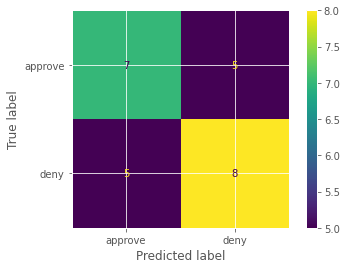

In [69]:
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()

# Generate Classification Report

In [66]:
from sklearn.metrics import classification_report
target_names = ["approve", "deny"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     approve       0.58      0.58      0.58        12
        deny       0.62      0.62      0.62        13

    accuracy                           0.60        25
   macro avg       0.60      0.60      0.60        25
weighted avg       0.60      0.60      0.60        25

